Get Yearly Total NSF Grant Awards, Plot them as time series Data

In [1]:
import xml.etree.cElementTree as ET
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import re

In [2]:
!ls */*.xml

/bin/sh: /bin/ls: Argument list too long


In [3]:
!cat xmlToCSV.py

import xml.etree.cElementTree as ET
import csv
import sys


# open a file for writing

Output = open('Output.csv', 'w')
csvwriter = csv.writer(Output)
header = ['Award', 'Division', 'First Name', 'Last Name', 'Institution', 'State']
csvwriter.writerow(header)
count = 0
for file in sys.argv:
    if(count==0):
        count+=1
        continue
    output_array = []
    tree = ET.ElementTree(file=file)
    for elem in tree.iter('AwardAmount'):
            Award = elem.text
    output_array.append(Award)
    for elem in tree.iter('Division'):
        for sub in elem.iter('LongName'):
            Division = sub.text
    output_array.append(Division)
    for elem in tree.iter('Investigator'):
        for sub in elem.iter('FirstName'):
            FirstName = sub.text
        for sub in elem.iter('LastName'):
            LastName = sub.text
    output_array.append(FirstName)
    output_array.append(LastName)
    for elem in tree.iter('Institution'):
        for sub in elem.iter('Name'):
     

!for i in `ls -d */`;
    do echo \$i;
    python  xmlToCSV.py \$i/*.xml;
    mv Output.csv \$i;
done

a few of these are too long and require piping ls to a file, then reading the file for arguments to write from.

A few of them required editing out nonstandard characters, about 5 files total.

In [13]:
!ls */*.csv

1959/Output.csv 1972/Output.csv 1984/Output.csv 1996/Output.csv 2008/Output.csv
1961/Output.csv 1973/Output.csv 1985/Output.csv 1997/Output.csv 2009/Output.csv
1962/Output.csv 1974/Output.csv 1986/Output.csv 1998/Output.csv 2010/Output.csv
1963/Output.csv 1975/Output.csv 1987/Output.csv 1999/Output.csv 2011/Output.csv
1964/Output.csv 1976/Output.csv 1988/Output.csv 2000/Output.csv 2012/Output.csv
1965/Output.csv 1977/Output.csv 1989/Output.csv 2001/Output.csv 2013/Output.csv
1966/Output.csv 1978/Output.csv 1990/Output.csv 2002/Output.csv 2014/Output.csv
1967/Output.csv 1979/Output.csv 1991/Output.csv 2003/Output.csv 2015/Output.csv
1968/Output.csv 1980/Output.csv 1992/Output.csv 2004/Output.csv 2016/Output.csv
1969/Output.csv 1981/Output.csv 1993/Output.csv 2005/Output.csv 2017/Output.csv
1970/Output.csv 1982/Output.csv 1994/Output.csv 2006/Output.csv
1971/Output.csv 1983/Output.csv 1995/Output.csv 2007/Output.csv


In [20]:
directories = range(1961, 2017)

In [21]:
dataDict = {}

for directory in directories:
    fstring = str(directory) + "/Output.csv"
    data = pd.read_csv(fstring)
    dataDict[directory] = data

In [25]:
#check to make sure each dataframe has an appropriate number of frames.
#for directory in dataDict.keys():
#    print directory, dataDict[directory].shape

<Container object of 56 artists>

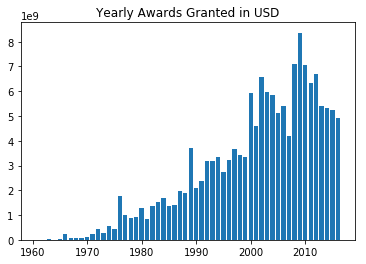

In [33]:
#find the yearly total of each year.
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    yvals[i] = np.sum(dataDict[directory].Award)
    #print directory, yvals[i]
    i=i+1
import pylab
pylab.title("Yearly Awards Granted in USD")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

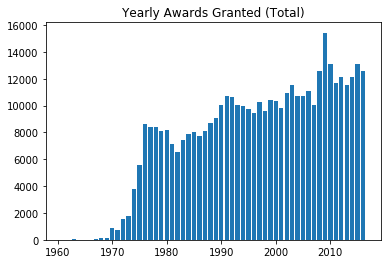

In [34]:
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    yvals[i] = dataDict[directory].shape[0]
    #print directory, yvals[i]
    i=i+1
import pylab
pylab.title("Yearly Awards Granted (Total)")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

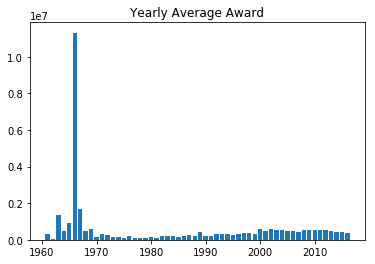

In [41]:
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    summation = np.sum(dataDict[directory].Award)
    yvals[i] = float(summation) / dataDict[directory].shape[0]
    #print directory, yvals[i]
    i=i+1
pylab.title("Yearly Average Award")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

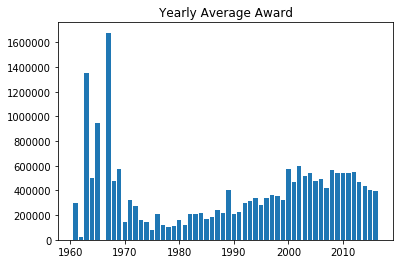

In [42]:
#splice out the abnormally high value
yvals[5] = 0
pylab.title("Yearly Average Award")
pylab.bar( xvals, yvals)

<Container object of 25 artists>

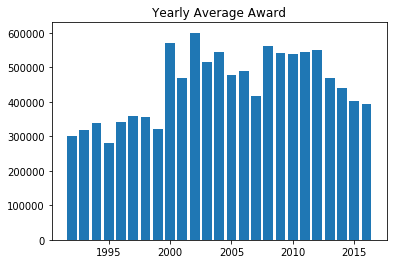

In [44]:
#look at the last 25 years
yvals[5] = 0
pylab.title("Yearly Average Award")
pylab.bar( xvals[-25:], yvals[-25:])